<a href="https://colab.research.google.com/github/Gail529/Taylor/blob/main/Taylor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
audio_data=pd.read_excel('/content/audio_features.xlsx')
audio_data.head(2)

,album,song,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,evermore,willow,0.833,0.392,0.574,0.00179,0.145,-9.195,0.1700,81.112,0.529,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,evermore,champagne problems,0.920,0.462,0.240,0.00000,0.113,-12.077,0.0377,171.319,0.320,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
lyrics_data=pd.read_csv('/content/taylor_emotion_scores.csv')
lyrics_data.head(2)

,Unnamed: 0,Unnamed: 0.1,song-title,lyrics,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,0,State of Grace,walking fast traffic lights busy streets busy ...,21,19,8,11,2,12,11,8,7,8
1,1,1,Red,loving like driving new maserati deadend stree...,14,12,6,2,2,7,11,17,2,10


# Emotions

In [41]:
col_sum=lyrics_data.sum(axis = 0, skipna = True)

Unnamed: 0                                                   4465
Unnamed: 0.1                                                 4465
song-title      State of GraceRedTreacherousI Knew You Were Tr...
lyrics          walking fast traffic lights busy streets busy ...
Positive                                                     1609
Negative                                                     1409
Anger                                                         641
Anticipation                                                  924
Disgust                                                       510
Fear                                                          894
Joy                                                          1149
Sadness                                                       932
Surprise                                                      486
Trust                                                         777
dtype: object

In [42]:
positive_score=df['Positive'].sum()
negative_score=df['Negative'].sum()


NameError: ignored

In [14]:
lyrics_data.shape


(95, 14)

In [20]:
lyr_arr=[]
for i in (0,94):
    song_lyrics=lyrics_data.lyrics[i]
    lyr_arr.append(song_lyrics)


In [24]:
import string
table = str.maketrans('', '', string.punctuation)
clean_lyrics = [l.translate(table) for l in lyr_arr]
listToStr = ' '.join([str(words) for words in clean_lyrics]) 
  
print(listToStr)  


walking fast traffic lights busy streets busy lives know touch go alone changing minds fall love til hurts bleeds fades time never never saw coming never never come around armor falls pierce room like cannon ball know nt let go alone room slates clean twin fire signs four blue eyes never saint loved shades wrong learn live pain mosaic broken hearts love great wild never ohoh ohoh ouhooh never saw coming ohoh ohoh ouhooh ohoh ohoh ouhooh ohoh ohoh ouhooh never ohoh ohoh ouhooh never state grace worth fight love ruthless game unless play good right hands fate achilles heel golden age something good right real never never saw coming never yeah ohoh never ohoh ohoh ouhooh never saw coming ohoh ohoh ouhooh ohoh ohoh ouhooh ohoh ohoh ouhooh never ohoh ohoh ouhooh never saint loved shades wrong learn live pain mosaic broken hearts love great wild state grace worth fight love ruthless game unless play good right I m like the water when your ship rolled in that night Rough on the surface but yo

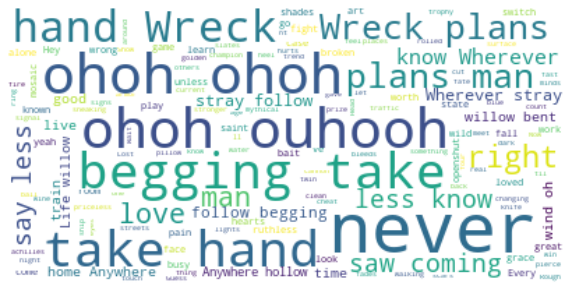

In [28]:
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words= 2000).generate(listToStr)
plt.figure(figsize=(10, 8))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()


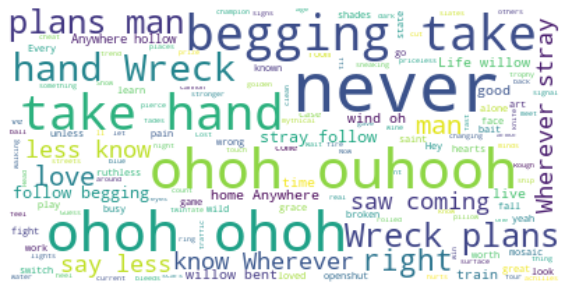

In [38]:
#improving the word clouds
stopwords = set(STOPWORDS)
new_stopwords=stopwords.update('ohoh','ouhooh','hand','plans','never')
wordcl = WordCloud(stopwords=new_stopwords, background_color="white", max_font_size=50, max_words= 2000).generate(listToStr)
plt.figure(figsize=(10, 8))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()


# AUDIO FEATURES
Popularity

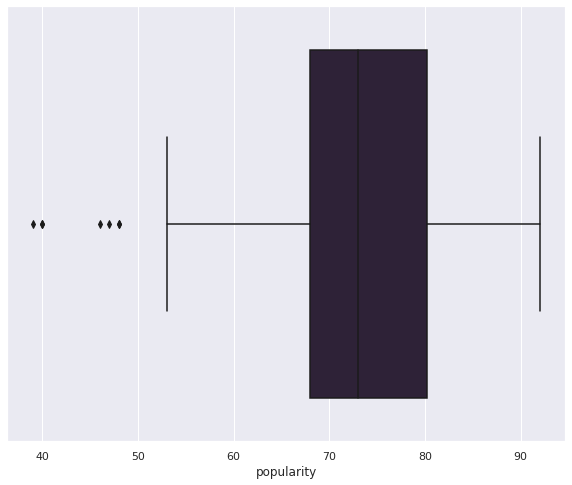

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,8))
ax =sns.boxplot(x=data['popularity'])

Text(0.5, 1.0, 'Most popular songs')

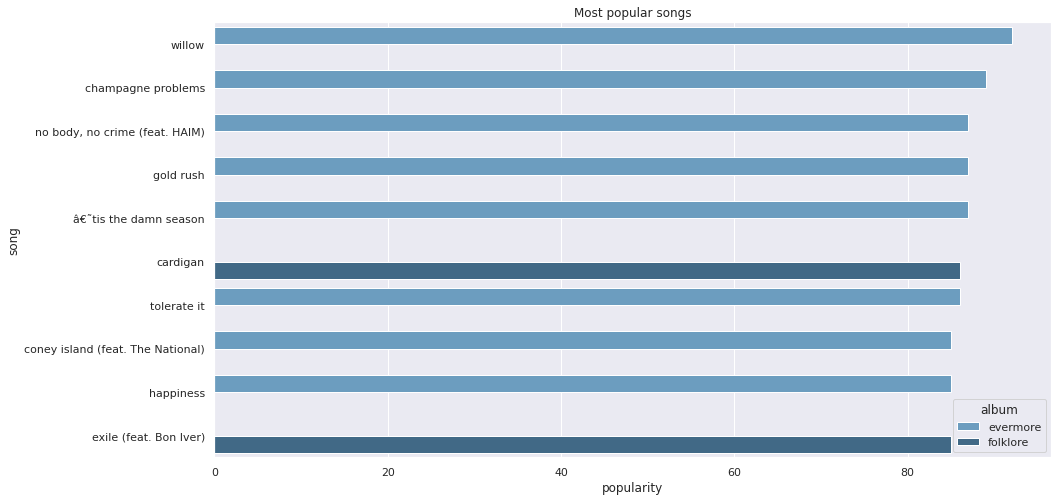

In [ ]:
pop_data=data
pop_data.sort_values(by=['popularity'],inplace=True,ascending=False)
final_data=pop_data.head(10)
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(15,8))
ax = sns.barplot(x="popularity", y="song", data=final_data,palette="Blues_d",hue="album")
plt.title('Most popular songs')

Text(0.5, 1.0, 'Least popular songs')

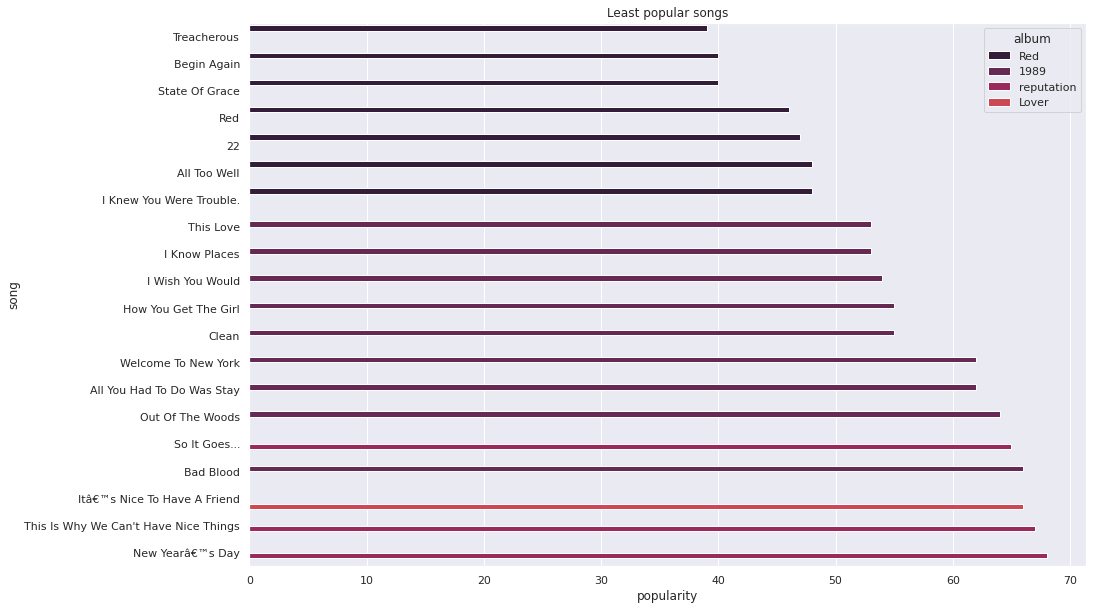

In [ ]:
pop_data=data
pop_data.sort_values(by=['popularity'],inplace=True,ascending=True)
final_data=pop_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="popularity", y="song", data=final_data,hue="album")
plt.title('Least popular songs')

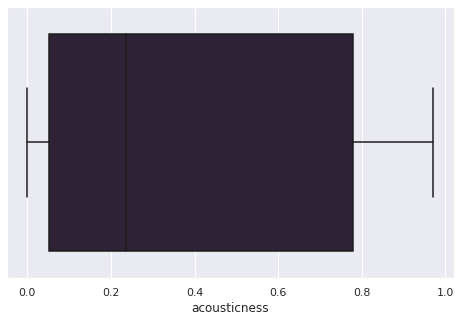

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(8,5))
ax =sns.boxplot(x=data['acousticness'])

Text(0.5, 1.0, 'Least Acoustic songs')

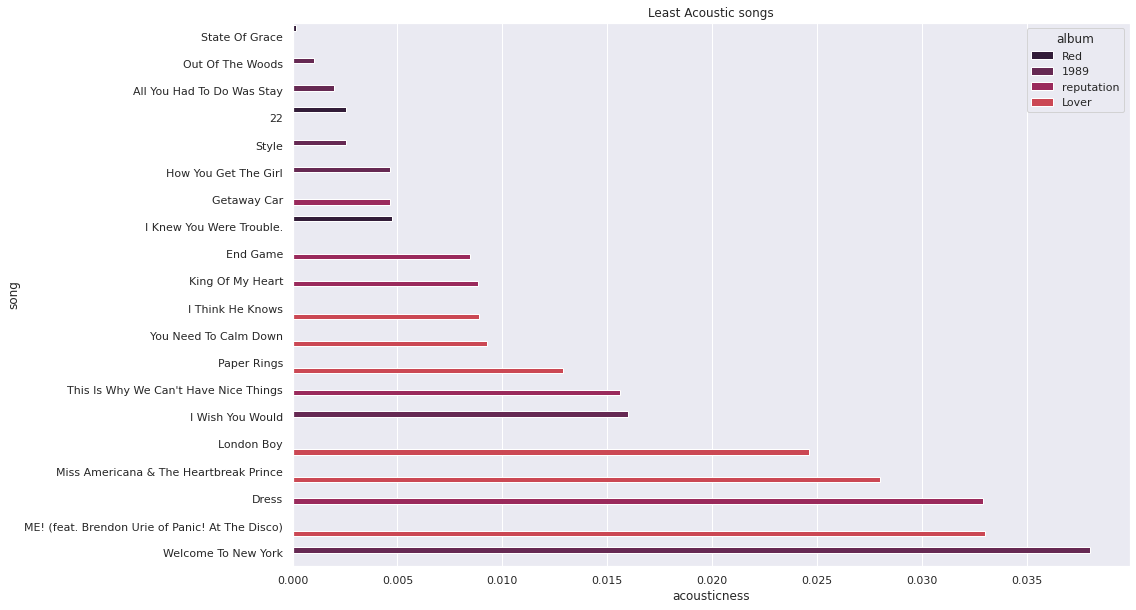

In [ ]:
acoustic_data=data
acoustic_data.sort_values(by=['acousticness'],inplace=True,ascending=True)
final_data=acoustic_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="acousticness", y="song", data=final_data,hue="album")
plt.title('Least Acoustic songs')

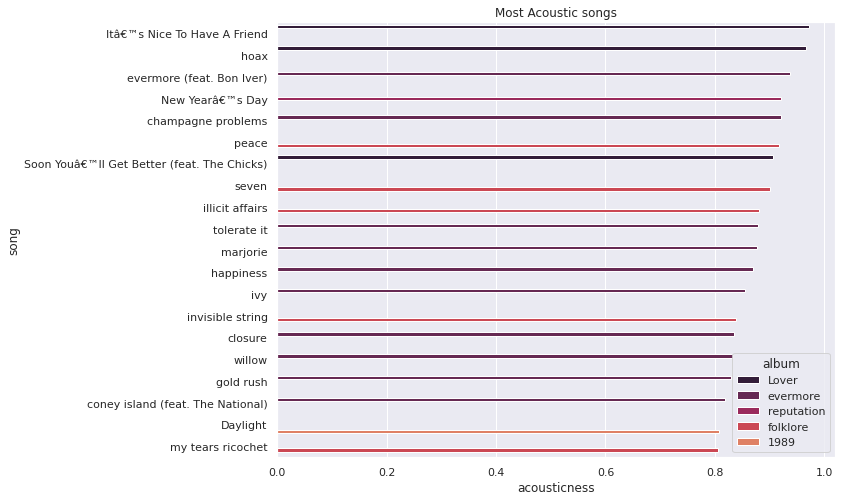

In [ ]:
acoustic_data=data
acoustic_data.sort_values(by=['acousticness'],inplace=True,ascending=False)
final_data=acoustic_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="acousticness", y="song", data=final_data,hue="album")
plt.title('Most Acoustic songs')
plt.show()


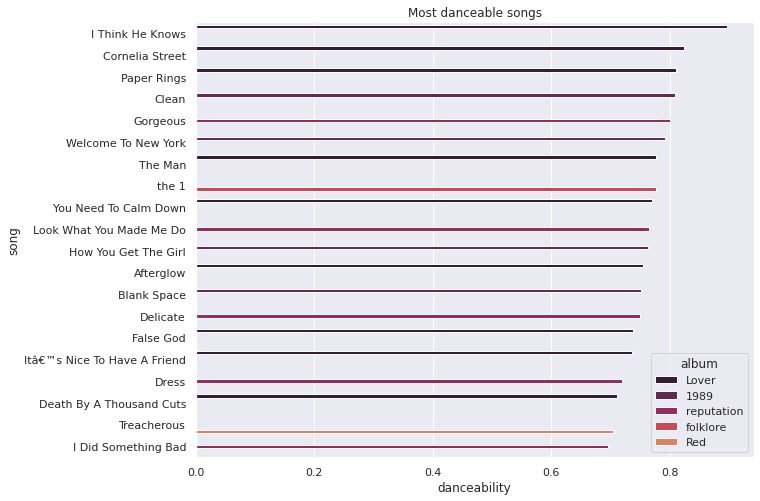

In [ ]:

dance_data=data
dance_data.sort_values(by=['danceability'],inplace=True,ascending=False)
final_data=dance_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="danceability", y="song", data=final_data,hue="album")
plt.title('Most danceable songs')
plt.show()


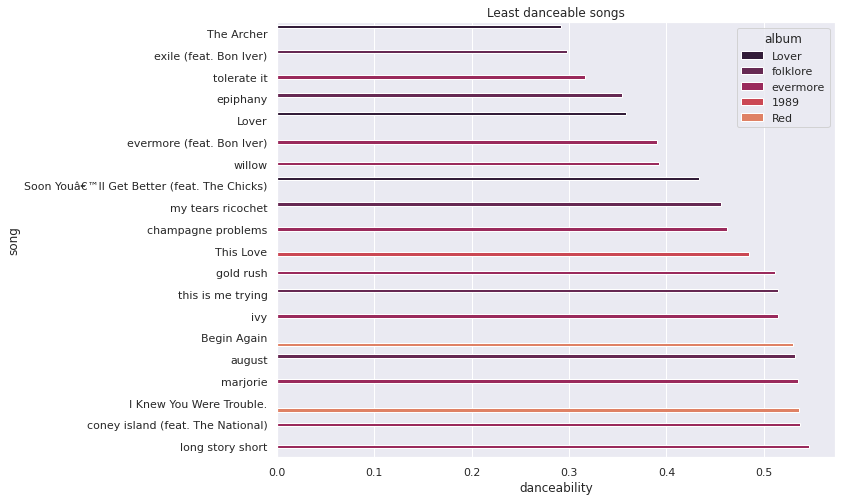

In [ ]:
dance_data=data
dance_data.sort_values(by=['danceability'],inplace=True,ascending=True)
final_data=dance_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="danceability", y="song", data=final_data,hue="album")
plt.title('Least danceable songs')
plt.show()


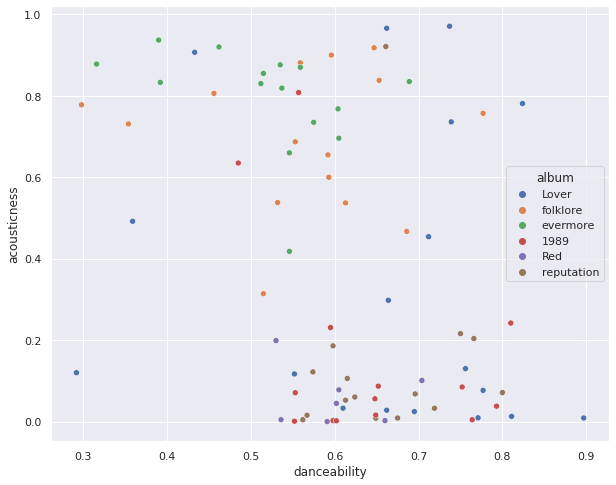

In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
ax = sns.scatterplot(data=data,x="danceability",y="acousticness",hue="album")


In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
ax = sns.scatterplot(data=data,x="danceability",y="acousticness",hue="album")